In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:99% !important;}
div.cell.code_cell.rendered{width:90%;}
div.CodeMirror {font-family:Consolas; font-size:20pt;}
div.output {font-size:20pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:19pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
span.toc-item-num{display:none;}
div.text_cell_render ul li{font-size:16pt;padding:5px;}
div.CodeMirror-lines > div {padding-left:10px;}
table.dataframe{font-size:19px;}
</style>
"""))

In [1]:
import numpy as np
import pandas as pd
import sys
from tensorflow.keras import utils # utils.to_categorical
from tensorflow.keras.models import Sequential # 모델생성
from tensorflow.keras.layers import Dense, Input
import matplotlib.pyplot as plt

# 로지스틱회귀분석(이진분류)
## 1. 데이터셋 생성 & 전처리

In [11]:
df = pd.read_csv('data/pima-indians-diabetes.csv', comment='#', header=None)
df.values[:2]
# 결측치 없으므로, csv파일을 바로 넘파이 배열로 읽어올 예정

array([[  6.   , 148.   ,  72.   ,  35.   ,   0.   ,  33.6  ,   0.627,
         50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   ,  29.   ,   0.   ,  26.6  ,   0.351,
         31.   ,   0.   ]])

In [9]:
# np.set_printoptions(threshold=sys.maxsize)

In [ ]:
# 1. 임신횟수
# 2. 2시간내 포도당 농도
# 3. 혈압
# 4. 피부접힘 두께
# 5. 인슐린수치
# 6. BMI체질량지수
# 7. 가족력
# 8. 나이
# 9. 당뇨병발병여부

In [2]:
# csv파일을 numpy 배열로 읽어오기 np.loadtxt(), np.genfromtxt() #이 있는 행은 제외하여 읽어옴
dataset = np.loadtxt('data/pima-indians-diabetes.csv', delimiter=',')
dataset.shape

(768, 9)

In [7]:
# 학습데이터셋(학습용 데이터:train dataset) : 모델 학습시 사용
X_train = dataset[:700, :-1]
y_train = dataset[:700, -1]
# 테스트데이터셋(시험용 데이터:test dataset) : 모델 평가시 사용
X_test = dataset[700:, :-1]
y_test = dataset[700:, -1]
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((700, 8), (700,), (68, 8), (68,))

## 2. 모델 구성

In [30]:
model = Sequential()
model.add(Input(shape=(8,)))
model.add(Dense(units=12, activation='relu'))
model.add(Dense(units=8, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 12)                108       
                                                                 
 dense_20 (Dense)            (None, 8)                 104       
                                                                 
 dense_21 (Dense)            (None, 1)                 9         
                                                                 
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


## 3. 학습과정 설정

In [31]:
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_accuracy'])

## 4. 학습

In [32]:
hist = model.fit(X_train, y_train, # 훈련데이터
                 epochs=200,
                 # batch_size=350,
                 # validation_split=0.2 # 검증 데이터 비율(훈련데이터셋 중 20%를 검증용 데이터로)
                 verbose=0
                )

## 5. 모델 평가하기(학습과정보기, 평가)

In [22]:
hist.history.keys()

dict_keys(['loss', 'binary_accuracy'])

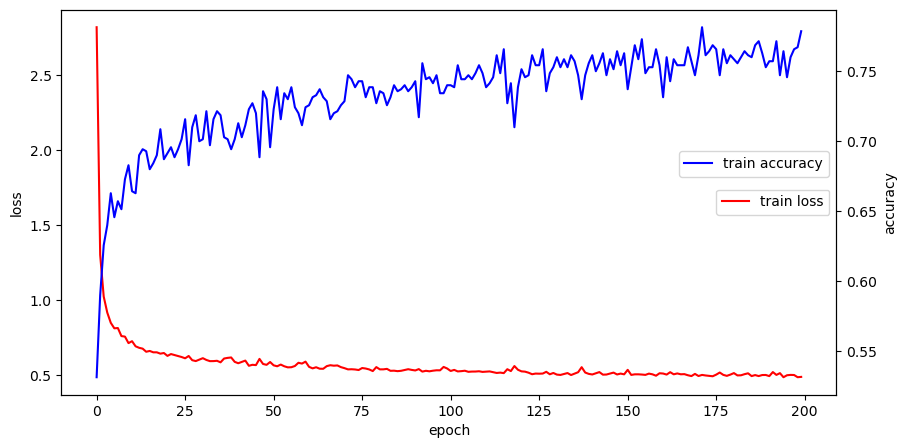

In [33]:
# 학습과정 표시하기(validation dataset 없는 경우)
fig, loss_ax = plt.subplots(figsize=(10,5))
loss_ax.plot(hist.history['loss'], 'r', label='train loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history['binary_accuracy'], 'b', label='train accuracy')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='center right')
acc_ax.legend(bbox_to_anchor=(0.999, 0.65))
plt.show()

In [34]:
# 모델 평가(X)
model.evaluate(X_train, y_train)

22/22 [==============================] - 0s 3ms/step - loss: 0.4889 - binary_accuracy: 0.7771


[0.4889054596424103, 0.7771428823471069]

In [35]:
# 모델 평가(o)
score = model.evaluate(X_test, y_test)
print("loss : {}, 정확도 : {}%".format(score[0], score[1]*100))

3/3 [==============================] - 0s 3ms/step - loss: 0.6064 - binary_accuracy: 0.7941
loss : 0.6064150929450989, 정확도 : 79.41176295280457%


## 6. 모델 사용하기

In [45]:
X_train[10], y_train[10]

(array([  4.   , 110.   ,  92.   ,   0.   ,   0.   ,  37.6  ,   0.191,
         30.   ]),
 0.0)

In [39]:
model.predict([[6, 148, 72, 35, 0, 33.6, 0.6, 50]])

1/1 [==============================] - 0s 31ms/step


array([[0.76793426]], dtype=float32)

In [46]:
(model.predict([[4, 110, 92, 0, 0, 37.6, 0.191, 30],
                   [6, 148, 72, 35, 0, 33.6, 0.6, 45]]) > 0.5).astype(int)

1/1 [==============================] - 0s 31ms/step


array([[0],
       [1]])

## 7. 교차표
- 테스트 데이터셋의 실제값(y_test)과 예측값

In [54]:
y_hat = (model.predict(X_test)>0.5).astype(float)
cnt1=0; cnt2=0; cnt3=0; cnt4=0
# y_hat.shape, y_test.shape
for h, y in zip(y_hat.reshape(-1), y_test.reshape(-1)):
    if h==1.0 and y==1.0:
        cnt1 += 1
    elif y==1.0 and h==0.0:
        cnt2 += 1
    elif y==0.0 and h==1.0:
        cnt3 += 1
    else:
        cnt4 += 1
print(cnt1, cnt2)
print(cnt3, cnt4)

3/3 [==============================] - 0s 2ms/step
17 10
4 37


In [60]:
ctab = pd.crosstab(y_test, y_hat.reshape(-1))
ctab.index.name = '실제값'
ctab.columns.name='예측값'
ctab

예측값,0.0,1.0
실제값,,
0.0,37,4
1.0,10,17


# 분류분석
```
1. 데이터셋 생성 및 전처리 : 훈련셋600, 검증셋100, 테스트셋68으로 분리, 종속변수의 원핫인코딩
2. 모델생성(input 8, target 2) : 출력층에서의 활성화함수 'softmax'
    * model.summary()에서 파라미터 수 확인
3. 모델학습과정 설정 : loss='categorical_crossentropy' metrics=['accuracy']
4. 모델 학습 : validation_data=[X_val, Y_val] 추가해서 학습
5. 모델 학습 평가 : 그래프(hist.history.keys()를 확인후 4가지)
             평가(X_test, Y_test)
             교차표(pd.crosstab 이용)
6. 모델 사용하기 - 예측
              0      1
             0.9912  0.00124
```

In [2]:
import numpy as np
import pandas as pd
import sys
from tensorflow.keras import utils # utils.to_categorical
from tensorflow.keras.models import Sequential # 모델생성
from tensorflow.keras.layers import Dense, Input
import matplotlib.pyplot as plt

## 1. 데이터셋 생성 및 전처리

In [3]:
dataset = np.loadtxt('data/pima-indians-diabetes.csv', delimiter=',')
dataset.shape

(768, 9)

In [4]:
# 훈련셋600, 검증셋100, 테스트셋68으로 분리
X_train = dataset[:600, :-1]
y_train = dataset[:600, -1]
X_val = dataset[600:700, :-1]
y_val = dataset[600:700, -1]
X_test = dataset[700:, :-1]
y_test = dataset[700:, -1]
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((600, 8), (600,), (100, 8), (100,), (68, 8), (68,))

In [5]:
# 종속변수의 원핫인코딩
Y_train = utils.to_categorical(y_train, 2)
Y_val = utils.to_categorical(y_val, 2)
Y_test = utils.to_categorical(y_test, 2)
X_train.shape, Y_train.shape, X_val.shape, y_val.shape, X_test.shape, Y_test.shape

((600, 8), (600, 2), (100, 8), (100,), (68, 8), (68, 2))

In [6]:
y_train[:2], Y_train[:2]

(array([1., 0.]),
 array([[0., 1.],
        [1., 0.]], dtype=float32))

In [8]:
np.c_[y_train[:2], Y_train[:2]]

array([[1., 0., 1.],
       [0., 1., 0.]])

## 2. 모델생성(input 8, target 2) 

In [7]:
model = Sequential()
model.add(Input(shape=(8,)))
model.add(Dense(units=12, activation='relu'))
model.add(Dense(units=8, activation='relu'))
model.add(Dense(units=2, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                108       
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 2)                 18        
                                                                 
Total params: 230
Trainable params: 230
Non-trainable params: 0
_________________________________________________________________


## 3. 학습과정 설정

In [8]:
model.compile(loss='categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])

## 4. 모델 학습

In [9]:
hist = model.fit(X_train, Y_train, 
                epochs=300,
                validation_data=(X_val, Y_val),
                verbose=1)

Epoch 1/300
19/19 [==============================] - 1s 17ms/step - loss: 3.1904 - accuracy: 0.5350 - val_loss: 2.0029 - val_accuracy: 0.6300
Epoch 2/300
19/19 [==============================] - 0s 9ms/step - loss: 1.9557 - accuracy: 0.6367 - val_loss: 1.6056 - val_accuracy: 0.7000
Epoch 3/300
19/19 [==============================] - 0s 9ms/step - loss: 1.6539 - accuracy: 0.6400 - val_loss: 1.4215 - val_accuracy: 0.7300
Epoch 4/300
19/19 [==============================] - 0s 8ms/step - loss: 1.5212 - accuracy: 0.6400 - val_loss: 1.2917 - val_accuracy: 0.7200
Epoch 5/300
19/19 [==============================] - 0s 9ms/step - loss: 1.4619 - accuracy: 0.6517 - val_loss: 1.1931 - val_accuracy: 0.7200
Epoch 6/300
19/19 [==============================] - 0s 8ms/step - loss: 1.3512 - accuracy: 0.6650 - val_loss: 1.1388 - val_accuracy: 0.7100
Epoch 7/300
19/19 [==============================] - 0s 8ms/step - loss: 1.2871 - accuracy: 0.6483 - val_loss: 1.0940 - val_accuracy: 0.7100
Epoch 8/300


Epoch 59/300
19/19 [==============================] - 0s 8ms/step - loss: 0.5837 - accuracy: 0.7033 - val_loss: 0.6045 - val_accuracy: 0.6700
Epoch 60/300
19/19 [==============================] - 0s 8ms/step - loss: 0.5833 - accuracy: 0.7150 - val_loss: 0.6324 - val_accuracy: 0.6700
Epoch 61/300
19/19 [==============================] - 0s 8ms/step - loss: 0.5883 - accuracy: 0.7117 - val_loss: 0.5969 - val_accuracy: 0.7300
Epoch 62/300
19/19 [==============================] - 0s 8ms/step - loss: 0.5755 - accuracy: 0.6983 - val_loss: 0.6386 - val_accuracy: 0.6800
Epoch 63/300
19/19 [==============================] - 0s 8ms/step - loss: 0.5719 - accuracy: 0.7117 - val_loss: 0.6174 - val_accuracy: 0.6700
Epoch 64/300
19/19 [==============================] - 0s 8ms/step - loss: 0.5846 - accuracy: 0.7150 - val_loss: 0.5876 - val_accuracy: 0.6900
Epoch 65/300
19/19 [==============================] - 0s 8ms/step - loss: 0.5845 - accuracy: 0.7233 - val_loss: 0.5953 - val_accuracy: 0.6800
Epoch 

19/19 [==============================] - 0s 8ms/step - loss: 0.5348 - accuracy: 0.7350 - val_loss: 0.5479 - val_accuracy: 0.7900
Epoch 117/300
19/19 [==============================] - 0s 9ms/step - loss: 0.5348 - accuracy: 0.7550 - val_loss: 0.5498 - val_accuracy: 0.7800
Epoch 118/300
19/19 [==============================] - 0s 8ms/step - loss: 0.5301 - accuracy: 0.7417 - val_loss: 0.5492 - val_accuracy: 0.7400
Epoch 119/300
19/19 [==============================] - 0s 8ms/step - loss: 0.5319 - accuracy: 0.7467 - val_loss: 0.5486 - val_accuracy: 0.7800
Epoch 120/300
19/19 [==============================] - 0s 8ms/step - loss: 0.5417 - accuracy: 0.7367 - val_loss: 0.5462 - val_accuracy: 0.7400
Epoch 121/300
19/19 [==============================] - 0s 8ms/step - loss: 0.5292 - accuracy: 0.7500 - val_loss: 0.5520 - val_accuracy: 0.7800
Epoch 122/300
19/19 [==============================] - 0s 8ms/step - loss: 0.5438 - accuracy: 0.7283 - val_loss: 0.5720 - val_accuracy: 0.7200
Epoch 123/300

19/19 [==============================] - 0s 8ms/step - loss: 0.5126 - accuracy: 0.7483 - val_loss: 0.5592 - val_accuracy: 0.7600
Epoch 174/300
19/19 [==============================] - 0s 8ms/step - loss: 0.5055 - accuracy: 0.7533 - val_loss: 0.5344 - val_accuracy: 0.7800
Epoch 175/300
19/19 [==============================] - 0s 8ms/step - loss: 0.5255 - accuracy: 0.7367 - val_loss: 0.5399 - val_accuracy: 0.7700
Epoch 176/300
19/19 [==============================] - 0s 8ms/step - loss: 0.5145 - accuracy: 0.7550 - val_loss: 0.5344 - val_accuracy: 0.8000
Epoch 177/300
19/19 [==============================] - 0s 9ms/step - loss: 0.5165 - accuracy: 0.7483 - val_loss: 0.5397 - val_accuracy: 0.7400
Epoch 178/300
19/19 [==============================] - 0s 8ms/step - loss: 0.5084 - accuracy: 0.7550 - val_loss: 0.6148 - val_accuracy: 0.7200
Epoch 179/300
19/19 [==============================] - 0s 7ms/step - loss: 0.5150 - accuracy: 0.7500 - val_loss: 0.5349 - val_accuracy: 0.8000
Epoch 180/300

19/19 [==============================] - 0s 8ms/step - loss: 0.5005 - accuracy: 0.7433 - val_loss: 0.5203 - val_accuracy: 0.7700
Epoch 231/300
19/19 [==============================] - 0s 8ms/step - loss: 0.4916 - accuracy: 0.7517 - val_loss: 0.5560 - val_accuracy: 0.7400
Epoch 232/300
19/19 [==============================] - 0s 8ms/step - loss: 0.4963 - accuracy: 0.7600 - val_loss: 0.5248 - val_accuracy: 0.8000
Epoch 233/300
19/19 [==============================] - 0s 8ms/step - loss: 0.4902 - accuracy: 0.7617 - val_loss: 0.5533 - val_accuracy: 0.7300
Epoch 234/300
19/19 [==============================] - 0s 8ms/step - loss: 0.5008 - accuracy: 0.7467 - val_loss: 0.5204 - val_accuracy: 0.7400
Epoch 235/300
19/19 [==============================] - 0s 9ms/step - loss: 0.4941 - accuracy: 0.7667 - val_loss: 0.5173 - val_accuracy: 0.8000
Epoch 236/300
19/19 [==============================] - 0s 8ms/step - loss: 0.4868 - accuracy: 0.7700 - val_loss: 0.5183 - val_accuracy: 0.7900
Epoch 237/300

19/19 [==============================] - 0s 8ms/step - loss: 0.4767 - accuracy: 0.7783 - val_loss: 0.5118 - val_accuracy: 0.7700
Epoch 288/300
19/19 [==============================] - 0s 8ms/step - loss: 0.4790 - accuracy: 0.7500 - val_loss: 0.5298 - val_accuracy: 0.7800
Epoch 289/300
19/19 [==============================] - 0s 7ms/step - loss: 0.4767 - accuracy: 0.7667 - val_loss: 0.5226 - val_accuracy: 0.7700
Epoch 290/300
19/19 [==============================] - 0s 8ms/step - loss: 0.4804 - accuracy: 0.7767 - val_loss: 0.5174 - val_accuracy: 0.7700
Epoch 291/300
19/19 [==============================] - 0s 8ms/step - loss: 0.4762 - accuracy: 0.7750 - val_loss: 0.5340 - val_accuracy: 0.7400
Epoch 292/300
19/19 [==============================] - 0s 8ms/step - loss: 0.4806 - accuracy: 0.7550 - val_loss: 0.5107 - val_accuracy: 0.7800
Epoch 293/300
19/19 [==============================] - 0s 8ms/step - loss: 0.4805 - accuracy: 0.7767 - val_loss: 0.5146 - val_accuracy: 0.7600
Epoch 294/300

## 5. 모델 학습 평가 

In [10]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

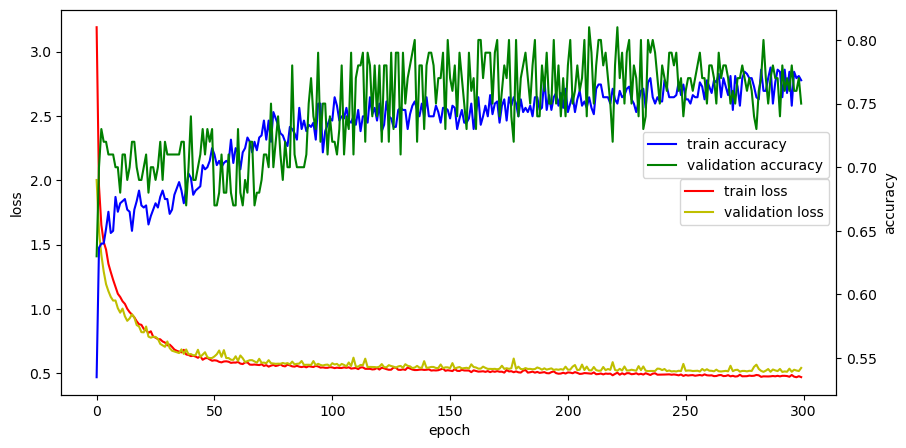

In [12]:
# 학습과정 표시하기(validation dataset 있는 경우)
fig, loss_ax = plt.subplots(figsize=(10,5))
loss_ax.plot(hist.history['loss'], 'r', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'y', label='validation loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history['accuracy'], 'b', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='validation accuracy')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='center right')
acc_ax.legend(bbox_to_anchor=(0.999, 0.7))
plt.show()

In [13]:
# 모델 평가하기(test dataset으로)
score = model.evaluate(X_test, Y_test)
print("Test Dataset loss : {}, accuracy(정확도) : {}".format(score[0], score[1]))

3/3 [==============================] - 0s 4ms/step - loss: 0.6755 - accuracy: 0.6176
Test Dataset loss : 0.6755282878875732, accuracy(정확도) : 0.6176470518112183


In [14]:
score # loss와 compile에서 metrics=['accuracy']지정으로 accuracy가 저장

[0.6755282878875732, 0.6176470518112183]

In [19]:
# 교차표(원핫인코딩을 이용한 분류분석, 이진분류)
# pd.crosstab(실제값을1차원, 예측값을1차원)
all(Y_test.argmax(axis=1) == y_test) # crosstabl에 들어갈 실제값

True

In [25]:
# 예측값
Y_hat = model.predict(X_test)
y_hat = Y_hat.argmax(axis=1)
y_hat = np.argmax(Y_hat, axis=1)
y_hat
# a = np.array([1,2,3])
# a.mean()
# np.mean(a)

3/3 [==============================] - 0s 2ms/step


array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0], dtype=int64)

In [27]:
ctab = pd.crosstab(y_test, y_hat)
ctab.index.name = '실제'
ctab.columns.name = '예측'
ctab

예측,0,1
실제,,
0.0,37,4
1.0,22,5


## 6. 모델사용하기

In [29]:
X_test[0], y_test[0]

(array([  2.   , 122.   ,  76.   ,  27.   , 200.   ,  35.9  ,   0.483,
         26.   ]),
 0.0)

In [34]:
pred = model.predict(np.array([[2, 122,76,27,200,35.9,0.483,26]]))
pred = model.predict([[2, 122,76,27,200,35.9,0.483,26],
                      [2, 122,76,27,200,35.9,0.483,26],]) # predict에는 2차원 데이터로
pred

1/1 [==============================] - 0s 39ms/step


array([[0.8627979 , 0.13720202],
       [0.8627979 , 0.13720202]], dtype=float32)

In [36]:
pred.argmax(axis=1)
np.argmax(pred, axis=1)

array([0, 0], dtype=int64)